Gather data

In [1]:
import pandas as pd

In [2]:
# get price data
df = pd.read_csv("price-data.csv")
df.head()

,timestamp,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
0,2020-01-02 00:00:00.000,7193.754668,130.484685,0.192556,NaN,13.685902,0.002026,0.033362,NaN,0.013199,...,NaN,NaN,NaN,NaN,0.038686,NaN,NaN,0.353788,4.381528,NaN
1,2020-01-03 00:00:00.000,6963.853354,127.045258,0.187433,NaN,13.007171,0.002008,0.032618,NaN,0.012845,...,NaN,NaN,NaN,NaN,0.036687,NaN,NaN,0.343728,4.098819,NaN
2,2020-01-04 00:00:00.000,7300.346935,133.702649,0.192299,NaN,13.603276,0.002049,0.033967,NaN,0.013371,...,NaN,NaN,NaN,NaN,0.038930,NaN,NaN,0.353166,4.227682,NaN
3,2020-01-05 00:00:00.000,7351.377053,134.136883,0.192812,NaN,13.794575,0.002189,0.034298,NaN,0.013438,...,NaN,NaN,NaN,NaN,0.040255,NaN,NaN,0.354280,4.253197,NaN
4,2020-01-06 00:00:00.000,7349.972248,135.005714,0.193816,NaN,14.006361,0.002070,0.034427,NaN,0.013512,...,NaN,NaN,NaN,NaN,0.038340,NaN,NaN,0.386061,4.199192,NaN


Compute daily log returns from daily price data

In [3]:
import numpy as np

In [4]:
# set timestamp column as the index
df.set_index("timestamp", inplace=True)

# compute daily log returns from daily price data
log_returns = np.log(df / df.shift(1))
log_returns.head()

,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,chainlink,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00.000,-0.032480,-0.026712,-0.026961,NaN,-0.050866,-0.008557,-0.022558,NaN,-0.027241,-0.038120,...,NaN,NaN,NaN,NaN,-0.053068,NaN,NaN,-0.028847,-0.066699,NaN
2020-01-04 00:00:00.000,0.047189,0.051075,0.025629,NaN,0.044810,0.019956,0.040541,NaN,0.040143,0.037832,...,NaN,NaN,NaN,NaN,0.059354,NaN,NaN,0.027087,0.030955,NaN
2020-01-05 00:00:00.000,0.006966,0.003242,0.002662,NaN,0.013965,0.066308,0.009696,NaN,0.004981,0.013014,...,NaN,NaN,NaN,NaN,0.033460,NaN,NaN,0.003148,0.006017,NaN
2020-01-06 00:00:00.000,-0.000191,0.006456,0.005193,NaN,0.015236,-0.055854,0.003744,NaN,0.005511,-0.017516,...,NaN,NaN,NaN,NaN,-0.048730,NaN,NaN,0.085908,-0.012779,NaN


### Checking for seasonality effects according to days of the week - across all coins

In [5]:
# add day of the week column
log_returns["day_of_week"] = pd.to_datetime(log_returns.index).day_name()
log_returns["day_of_week"]

timestamp
2020-01-02 00:00:00.000     Thursday
2020-01-03 00:00:00.000       Friday
2020-01-04 00:00:00.000     Saturday
2020-01-05 00:00:00.000       Sunday
2020-01-06 00:00:00.000       Monday
                             ...    
2024-12-28 00:00:00.000     Saturday
2024-12-29 00:00:00.000       Sunday
2024-12-30 00:00:00.000       Monday
2024-12-31 00:00:00.000      Tuesday
2025-01-01 00:00:00.000    Wednesday
Name: day_of_week, Length: 1828, dtype: object

In [6]:
# compute an aggregate (mean) return across all coins on each day
log_returns["aggregate"] = log_returns.iloc[:, :-1].mean(axis=1)
log_returns["aggregate"]

timestamp
2020-01-02 00:00:00.000         NaN
2020-01-03 00:00:00.000   -0.032993
2020-01-04 00:00:00.000    0.048107
2020-01-05 00:00:00.000    0.016507
2020-01-06 00:00:00.000    0.003813
                             ...   
2024-12-28 00:00:00.000    0.003547
2024-12-29 00:00:00.000    0.025823
2024-12-30 00:00:00.000   -0.037002
2024-12-31 00:00:00.000   -0.007394
2025-01-01 00:00:00.000   -0.002590
Name: aggregate, Length: 1828, dtype: float64

In [7]:
# create dataframe of just the returns of the aggregate and day of the week
aggregate = log_returns[["aggregate", "day_of_week"]]
aggregate.head()

,aggregate,day_of_week
timestamp,,
2020-01-02 00:00:00.000,NaN,Thursday
2020-01-03 00:00:00.000,-0.032993,Friday
2020-01-04 00:00:00.000,0.048107,Saturday
2020-01-05 00:00:00.000,0.016507,Sunday
2020-01-06 00:00:00.000,0.003813,Monday


In [8]:
# compute the mean of the aggregate's log returns, grouped by day of the week
mean_by_day_of_week = aggregate.groupby("day_of_week").mean()
mean_by_day_of_week = mean_by_day_of_week.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
mean_by_day_of_week

,aggregate
day_of_week,
Monday,0.000583
Tuesday,0.000392
Wednesday,0.000166
Thursday,0.000910
Friday,-0.001177
Saturday,0.003907
Sunday,0.004421


Visualization (first step in rejecting idea, want simplest test for rejecting idea, to prevent going down a rabbit hole of wasting time)

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Log Return')

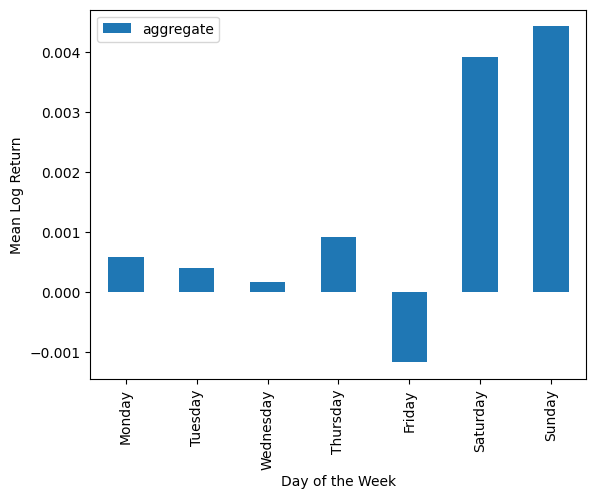

In [21]:
# plot mean of aggregate returns, grouped by day of the week
mean_by_day_of_week.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Log Return")

In [15]:
# compute median of the aggregate returns, grouped by day of the week
median_by_day_of_week = aggregate.groupby("day_of_week").median()
median_by_day_of_week = median_by_day_of_week.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
median_by_day_of_week

,aggregate
day_of_week,
Monday,0.003449
Tuesday,0.000796
Wednesday,0.002784
Thursday,0.004410
Friday,0.000748
Saturday,0.006351
Sunday,0.005525


Seems to be a slight weekend effect, but use the median to make sure it wasn't just dominated by outliers

Text(0, 0.5, 'Median Log Return')

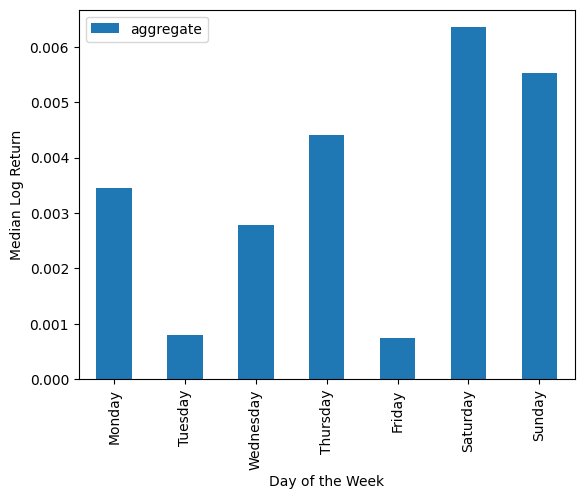

In [22]:
# plot median of aggregate returns, grouped by day of the week - maybe mean was dominated by outliers
median_by_day_of_week.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Median Log Return")

There does seem to be an effect, although it looks way less significant with the median returns. However, an effect is still visible.

We fail to reject the idea so far.

Persistence through time (do we this effect consistently throughout time?) (less likely to be due to randomness) ... (and relevant for practical purposes)

In [17]:
# plot a single metric (weekend returns - weekday returns) throughout time

# create a column for the week associated with each date
aggregate["week"] = pd.to_datetime(aggregate.index).to_period('W')

weekly_metrics = []

# group by week and compute the metric for each week
for week, group in aggregate.groupby("week"):
    weekend_returns = group[group["day_of_week"].isin(["Saturday", "Sunday"])]["aggregate"].sum()
    weekday_returns = group[~group["day_of_week"].isin(["Saturday", "Sunday"])]["aggregate"].sum()

    weekly_metric = weekend_returns - weekday_returns

    weekly_metrics.append({"week": week, "weekly_metric": weekly_metric})

# create dataframe out of weekly metrics
weekly_df = pd.DataFrame(weekly_metrics)
weekly_df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_16852\661096314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["week"] = pd.to_datetime(aggregate.index).to_period('W')


,week,weekly_metric
0,2019-12-30/2020-01-05,0.097608
1,2020-01-06/2020-01-12,-0.008417
2,2020-01-13/2020-01-19,-0.074426
3,2020-01-20/2020-01-26,0.065806
4,2020-01-27/2020-02-02,-0.124409


Text(0, 0.5, 'Weekly Metric (Log Return)')

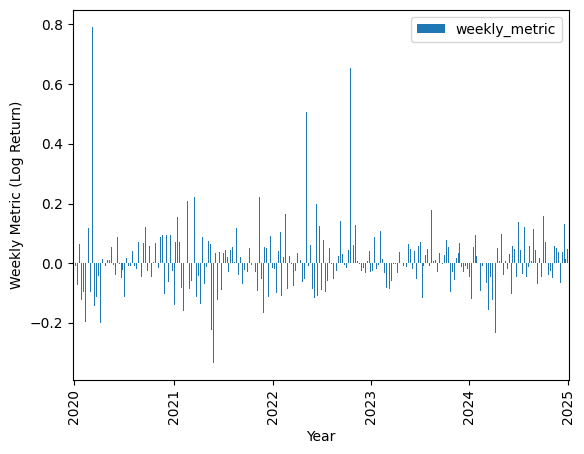

In [23]:
# plot the weekly metric throughout time
year_index = weekly_df[weekly_df["week"].dt.week == 1].index
year_labels = weekly_df.loc[year_index]["week"].dt.year

weekly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Weekly Metric (Log Return)")

In [ ]:
# same weekly metric - just plotted as a monthly figure

# create a column of the month associated with each date
aggregate["month"] = pd.to_datetime(aggregate.index).to_period('M')

monthly_metrics = []

day_list = ["Tuesday", "Wednesday", "Thursday", "Saturday", "Sunday"]

# group by month and compute the metric for each month
for month, group in aggregate.groupby("month"):
    days_of_interest = group[group["day_of_week"].isin(day_list)]["aggregate"].sum()
    non_days_of_interest = group[~group["day_of_week"].isin(day_list)]["aggregate"].sum()

    monthly_metric = days_of_interest - non_days_of_interest

    monthly_metrics.append({"month": month, "monthly_metric": monthly_metric})

# create dataframe out of monthly metrics
monthly_df = pd.DataFrame(monthly_metrics)
monthly_df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_13104\1547937911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["month"] = pd.to_datetime(aggregate.index).to_period('M')


,month,monthly_metric
0,2020-01,0.408522
1,2020-02,-0.155390
2,2020-03,0.738389
3,2020-04,0.107990
4,2020-05,0.344544


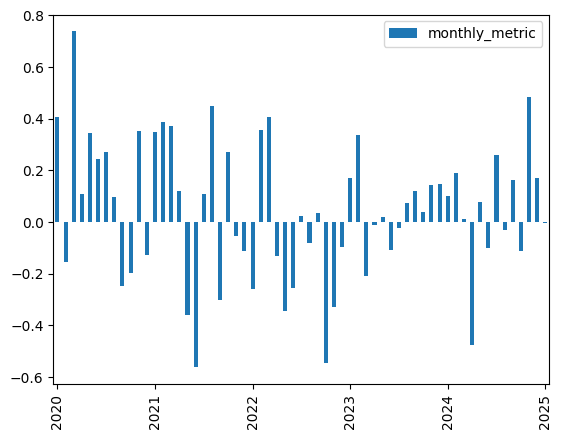

In [28]:
# plot the weekly metric, on a monthly cumulative basis
year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

monthly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);

Text(0, 0.5, 'Cumulative Log Return')

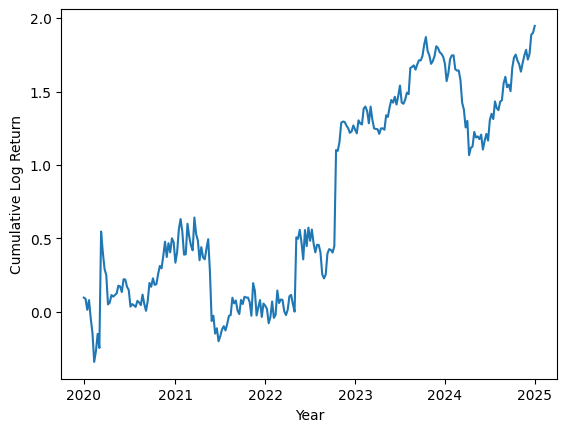

In [25]:
# plot as the weekly metric cumulatively (like a backtest equity curve)
weekly_df["cumulative_metric"] = weekly_df["weekly_metric"].cumsum()
weekly_df["cumulative_metric"].plot()

year_index = weekly_df[weekly_df["week"].dt.week == 1].index
year_labels = weekly_df.loc[year_index]["week"].dt.year

plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Return")

Statistical Test of Validity (non-parametric)

In [33]:
from scipy import stats

In [31]:
# drop any rows in NaN values
clean_aggregate = aggregate.dropna()

grouped_by_day = clean_aggregate.groupby("day_of_week")["aggregate"].apply(list)
grouped_by_day

day_of_week
Friday       [-0.032993221146206196, -0.0032071492310114303...
Monday       [0.0038134182737941595, 0.014294895759980495, ...
Saturday     [0.04810740406432166, 0.03346730108244188, 0.0...
Sunday       [0.016507389704224693, -0.0001971490626745137,...
Thursday     [-0.012677410963862618, 0.026665459849038592, ...
Tuesday      [0.049570567842120626, -0.014844958145441147, ...
Wednesday    [0.004188087005006681, 0.0924370919484626, 0.0...
Name: aggregate, dtype: object

In [34]:
# kruskal-willis test (generalization of ANOVA, non-parametric)
kruskal = stats.kruskal(*grouped_by_day)
kruskal.pvalue

np.float64(0.2667186056412564)

In [59]:
# permutation test (simple, non-parametric)

days_of_interest = ["Saturday", "Sunday"]

# observed test statistic - difference in mean returns between days of interest and non-days of interest
mean_days = mean_by_day_of_week.loc[days_of_interest].mean().item()
mean_non_days = mean_by_day_of_week.loc[~mean_by_day_of_week.index.isin(days_of_interest)].mean().item()
observed_stat = mean_days - mean_non_days

# perform permutation test
n_permutations = 1000
test_stats = []

for _ in range(n_permutations):
    # shuffle day of the week
    shuffled_day_of_week = aggregate["day_of_week"].sample(frac=1, replace=True)
    shuffled_day_of_week.index = aggregate.index
    
    # get mean of days of interest
    mean_days = aggregate[shuffled_day_of_week.isin(["Saturday", "Sunday"])]["aggregate"].mean()

    # get mean of non-days of interest
    mean_non_days = aggregate[~shuffled_day_of_week.isin(["Saturday", "Sunday"])]["aggregate"].mean()

    # compute test statistic
    test_stat = mean_days - mean_non_days

    # append to list
    test_stats.append(test_stat)

p_value = np.mean(np.abs(test_stats) >= np.abs(observed_stat))
p_value

np.float64(0.088)

## Bitcoin - most liquid, most participation (more efficient or more inefficient?)

In [26]:
# create df of just bitcoin's log returns
bitcoin = log_returns[["bitcoin", "day_of_week"]]
bitcoin

,bitcoin,day_of_week
timestamp,,
2020-01-02 00:00:00.000,NaN,Thursday
2020-01-03 00:00:00.000,-0.032480,Friday
2020-01-04 00:00:00.000,0.047189,Saturday
2020-01-05 00:00:00.000,0.006966,Sunday
2020-01-06 00:00:00.000,-0.000191,Monday
...,...,...
2024-12-28 00:00:00.000,-0.014172,Saturday
2024-12-29 00:00:00.000,0.008998,Sunday
2024-12-30 00:00:00.000,-0.016110,Monday


In [27]:
# compute the mean log returns, grouped by day of the week
mean_by_day_of_week = bitcoin.groupby("day_of_week").mean()
mean_by_day_of_week = mean_by_day_of_week.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
mean_by_day_of_week

,bitcoin
day_of_week,
Monday,0.000476
Tuesday,0.003667
Wednesday,0.001278
Thursday,0.004467
Friday,-0.001874
Saturday,0.000953
Sunday,0.000937


Text(0, 0.5, 'Mean Log Return')

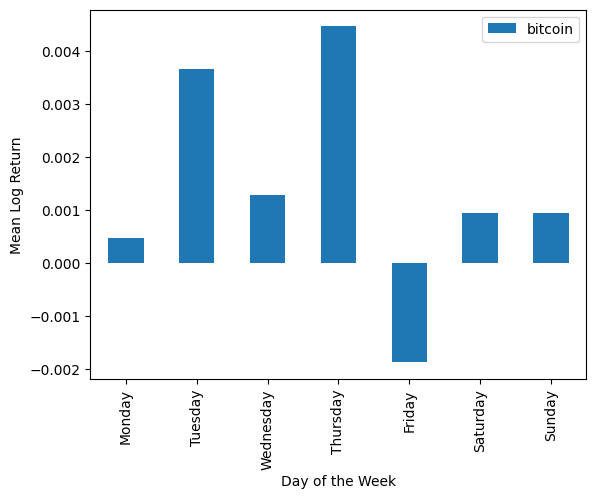

In [28]:
# plot mean returns of bitcoin, grouped by day of the week
mean_by_day_of_week.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Log Return")

In [29]:
# compute median of log returns, grouped by day of the week
median_by_day_of_week = bitcoin.groupby("day_of_week").median()
median_by_day_of_week = median_by_day_of_week.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
median_by_day_of_week

,bitcoin
day_of_week,
Monday,0.000285
Tuesday,0.001283
Wednesday,0.002293
Thursday,0.002154
Friday,-0.002330
Saturday,0.001071
Sunday,0.001425


Text(0, 0.5, 'Median Log Return')

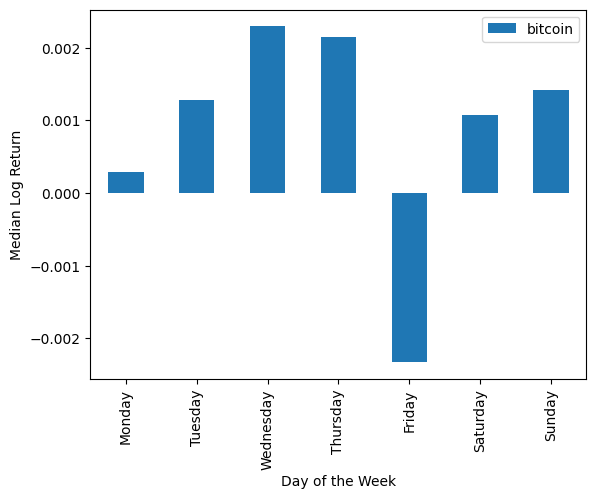

In [30]:
# plot median returns of bitcoin, grouped by day of the week
median_by_day_of_week.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Median Log Return")

Bitcoin - Check for consistency through time

In [31]:
# plot a single metric (weekend returns - weekday returns) throughout time

# create a column of week associated with each date
bitcoin["week"] = pd.to_datetime(bitcoin.index).to_period('W')

weekly_metrics = []

days_of_interest = ["Tuesday", "Wednesday", "Thursday", "Saturday", "Sunday"]

# group by week and compute the metric for each week
for week, group in bitcoin.groupby("week"):
    days_returns = group[group["day_of_week"].isin(days_of_interest)]["bitcoin"].sum()
    non_days_returns = group[~group["day_of_week"].isin(days_of_interest)]["bitcoin"].sum()

    weekly_metric = days_returns - non_days_returns

    weekly_metrics.append({"week": week, "weekly_metric": weekly_metric})

# create dataframe out of weekly metrics
weekly_df = pd.DataFrame(weekly_metrics)
weekly_df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_16852\3766383906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["week"] = pd.to_datetime(bitcoin.index).to_period('W')


,week,weekly_metric
0,2019-12-30/2020-01-05,0.086635
1,2020-01-06/2020-01-12,0.140104
2,2020-01-13/2020-01-19,0.089284
3,2020-01-20/2020-01-26,0.042921
4,2020-01-27/2020-02-02,0.006767


Text(0, 0.5, 'Weekly Metric (Log Return)')

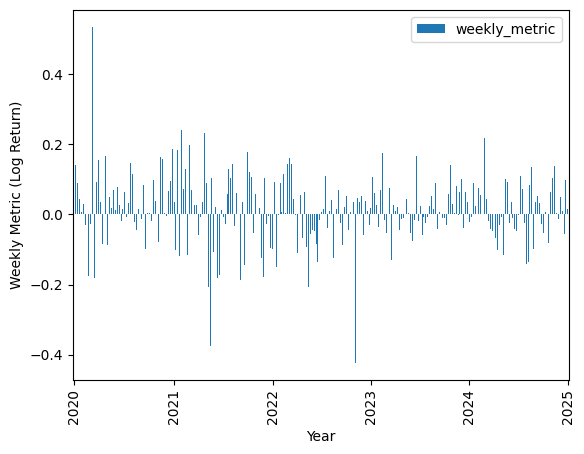

In [33]:
# plot weekly metric
year_index = weekly_df[weekly_df["week"].dt.week == 1].index
year_labels = weekly_df.loc[year_index]["week"].dt.year

weekly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Weekly Metric (Log Return)")

In [68]:
# same weekly metric - just plotted as a monthly figure

# create a column of month associated with each date
bitcoin["month"] = pd.to_datetime(bitcoin.index).to_period('M')

monthly_metrics = []

days_of_interest = ["Tuesday", "Wednesday", "Thursday", "Saturday", "Sunday"]

# group by month and compute the metric for each month
for month, group in bitcoin.groupby("month"):
    days_returns = group[group["day_of_week"].isin(day_list)]["bitcoin"].sum()
    non_days_returns = group[~group["day_of_week"].isin(day_list)]["bitcoin"].sum()

    monthly_metric = days_returns - non_days_returns

    monthly_metrics.append({"month": month, "monthly_metric": monthly_metric})

# create dataframe out of weekly metrics
monthly_df = pd.DataFrame(monthly_metrics)
monthly_df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_13104\1898526470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["month"] = pd.to_datetime(bitcoin.index).to_period('M')


,month,monthly_metric
0,2020-01,0.381245
1,2020-02,-0.205713
2,2020-03,0.537438
3,2020-04,0.078635
4,2020-05,0.105476


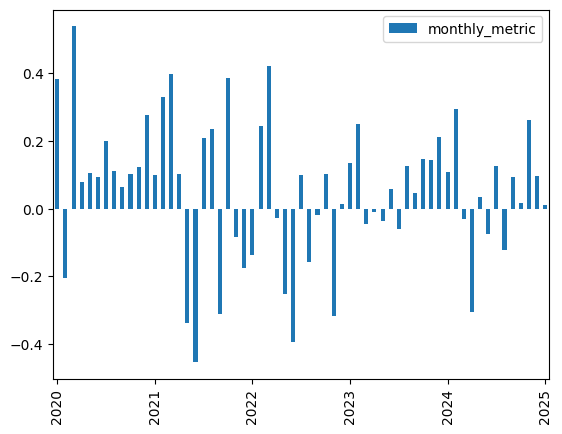

In [69]:
# plotted monthly
year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

monthly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);

Text(0, 0.5, 'Cumulative Log Return')

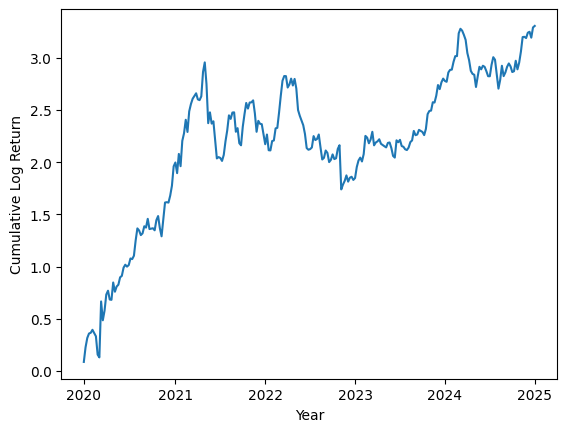

In [34]:
# plot as the weekly metric cumulatively (like a backtest equity curve)
weekly_cumulative = weekly_df["weekly_metric"].cumsum()

year_index = weekly_df[weekly_df["week"].dt.week == 1].index
year_labels = weekly_df.loc[year_index]["week"].dt.year

weekly_cumulative.plot()
plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Return")

Statistical Test of Validity

In [45]:
from scipy import stats

In [71]:
# remove na values
clean_bitcoin = bitcoin.dropna()
grouped_by_day = clean_bitcoin.groupby("day_of_week")["bitcoin"].apply(list)
grouped_by_day

day_of_week
Friday       [-0.032480278422501445, -0.026829375544213697,...
Monday       [-0.00019111240628208223, 0.019689273465013486...
Saturday     [0.04718890845290281, 0.043435394427536377, 0....
Sunday       [0.00696577743916258, -0.02080375892868698, 0....
Thursday     [-0.01255186373575921, 0.0021539125373604404, ...
Tuesday      [0.05101699557818573, -0.007462635962854061, -...
Wednesday    [0.05198719517381707, 0.08178657482126675, 0.0...
Name: bitcoin, dtype: object

In [72]:
# non-parametric test
kruskal = stats.kruskal(*grouped_by_day)
kruskal.pvalue

np.float64(0.6224125682401305)

In [73]:
# permutation test - more robust, simple

days_of_interest = ["Tuesday", "Wednesday", "Thursday", "Saturday", "Sunday"]

# observed test statistic - difference in mean returns between days and non-days
mean_days = mean_by_day_of_week.loc[days_of_interest].mean().item()
mean_non_days = mean_by_day_of_week.loc[~mean_by_day_of_week.index.isin(days_of_interest)].mean().item()
observed_stat = mean_days - mean_non_days

# perform permutation test
n_permutations = 1000
test_stats = []

for _ in range(n_permutations):
    # shuffle day of the week
    shuffled_day_of_week = clean_bitcoin["day_of_week"].sample(frac=1, replace=True)

    # set the index of the shuffled version to the original index
    shuffled_day_of_week.index = clean_bitcoin.index
    
    # get mean of 
    mean_days = clean_bitcoin[shuffled_day_of_week.isin(days_of_interest)]["bitcoin"].mean()

    # get mean of 
    mean_non_days = clean_bitcoin[~shuffled_day_of_week.isin(days_of_interest)]["bitcoin"].mean()

    # compute test statistic
    test_stat = mean_days - mean_non_days

    # append to list
    test_stats.append(test_stat)

p_value = np.mean(np.abs(test_stats) >= np.abs(observed_stat))
p_value

np.float64(0.091)